In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
import pandas as pd
import numpy as np
import os
try:
  import theano
except:
  !pip install Theano
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Theano: filename=Theano-1.0.5-py3-none-any.whl size=2668112 sha256=01aeea3e37741c78735bffb49bdf92ff40d6535ddfe5ab4ab3d2ac1e6e44b06d
  Stored in directory: /root/.cache/pip/wheels/84/cb/19/235b5b10d89b4621f685112f8762681570a9fa14dc1ce904d9
Successfully built Theano


In [ ]:
churn_data = pd.read_csv(r'Churn_Modelling.csv', index_col='RowNumber')
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_data.drop(['CustomerId', 'Surname'], axis=1, inplace=True)


In [ ]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Some of the columns have text data so we will execute One Hot Encoding.

In [ ]:
Geography_dummies = pd.get_dummies(prefix='Geo', data = churn_data, columns=['Geography'])


In [ ]:
Geography_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
Gender_dummies = Geography_dummies.replace(to_replace={'Gender':{'Female':1, 'Male':0}})


In [ ]:
Gender_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
churn_data_encoded = Gender_dummies

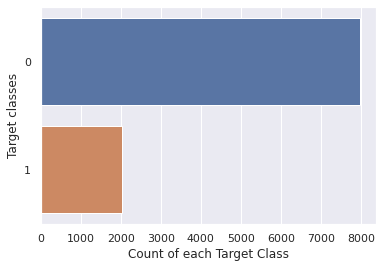

In [ ]:
sns.countplot(y=churn_data_encoded.Exited, data = churn_data_encoded)
plt.xlabel("Count of each Target Class")
plt.ylabel("Target classes")
plt.show()

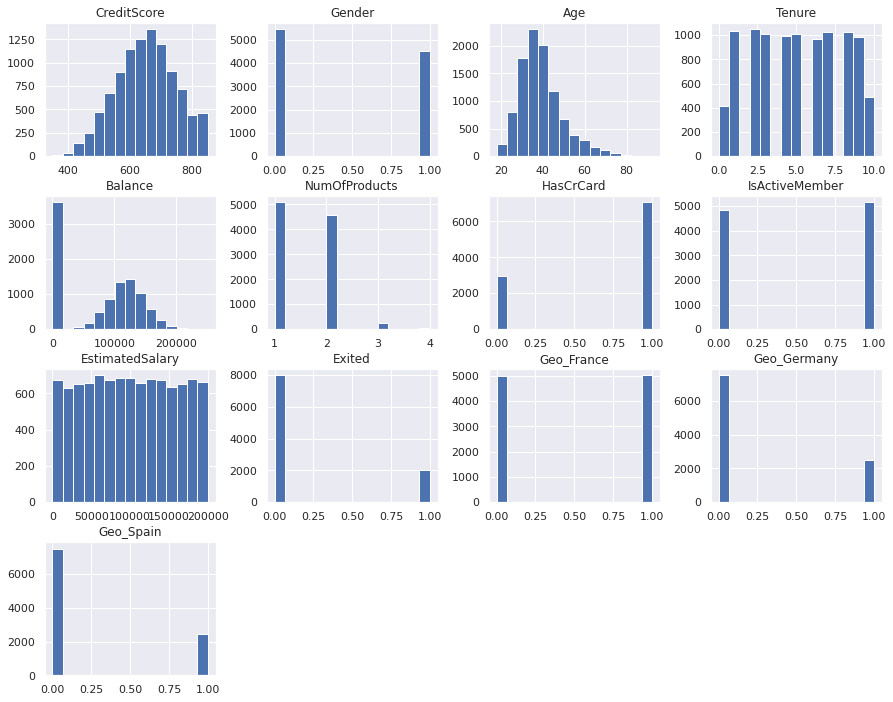

In [ ]:
churn_data_encoded.hist(figsize=(15, 12), bins=15)
plt.title("feature Distribution")
plt.show()

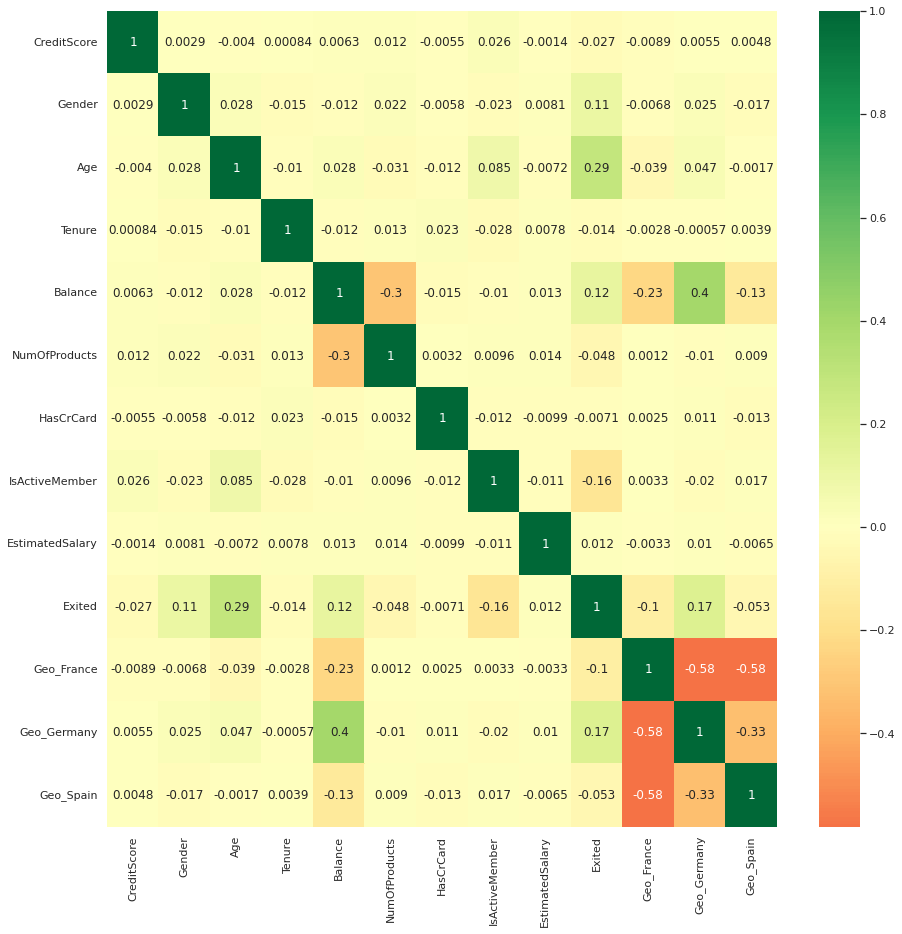

In [ ]:
plt.figure(figsize=(15, 15))
p = sns.heatmap(churn_data_encoded.corr(), annot=True, cmap='RdYlGn', center=0)


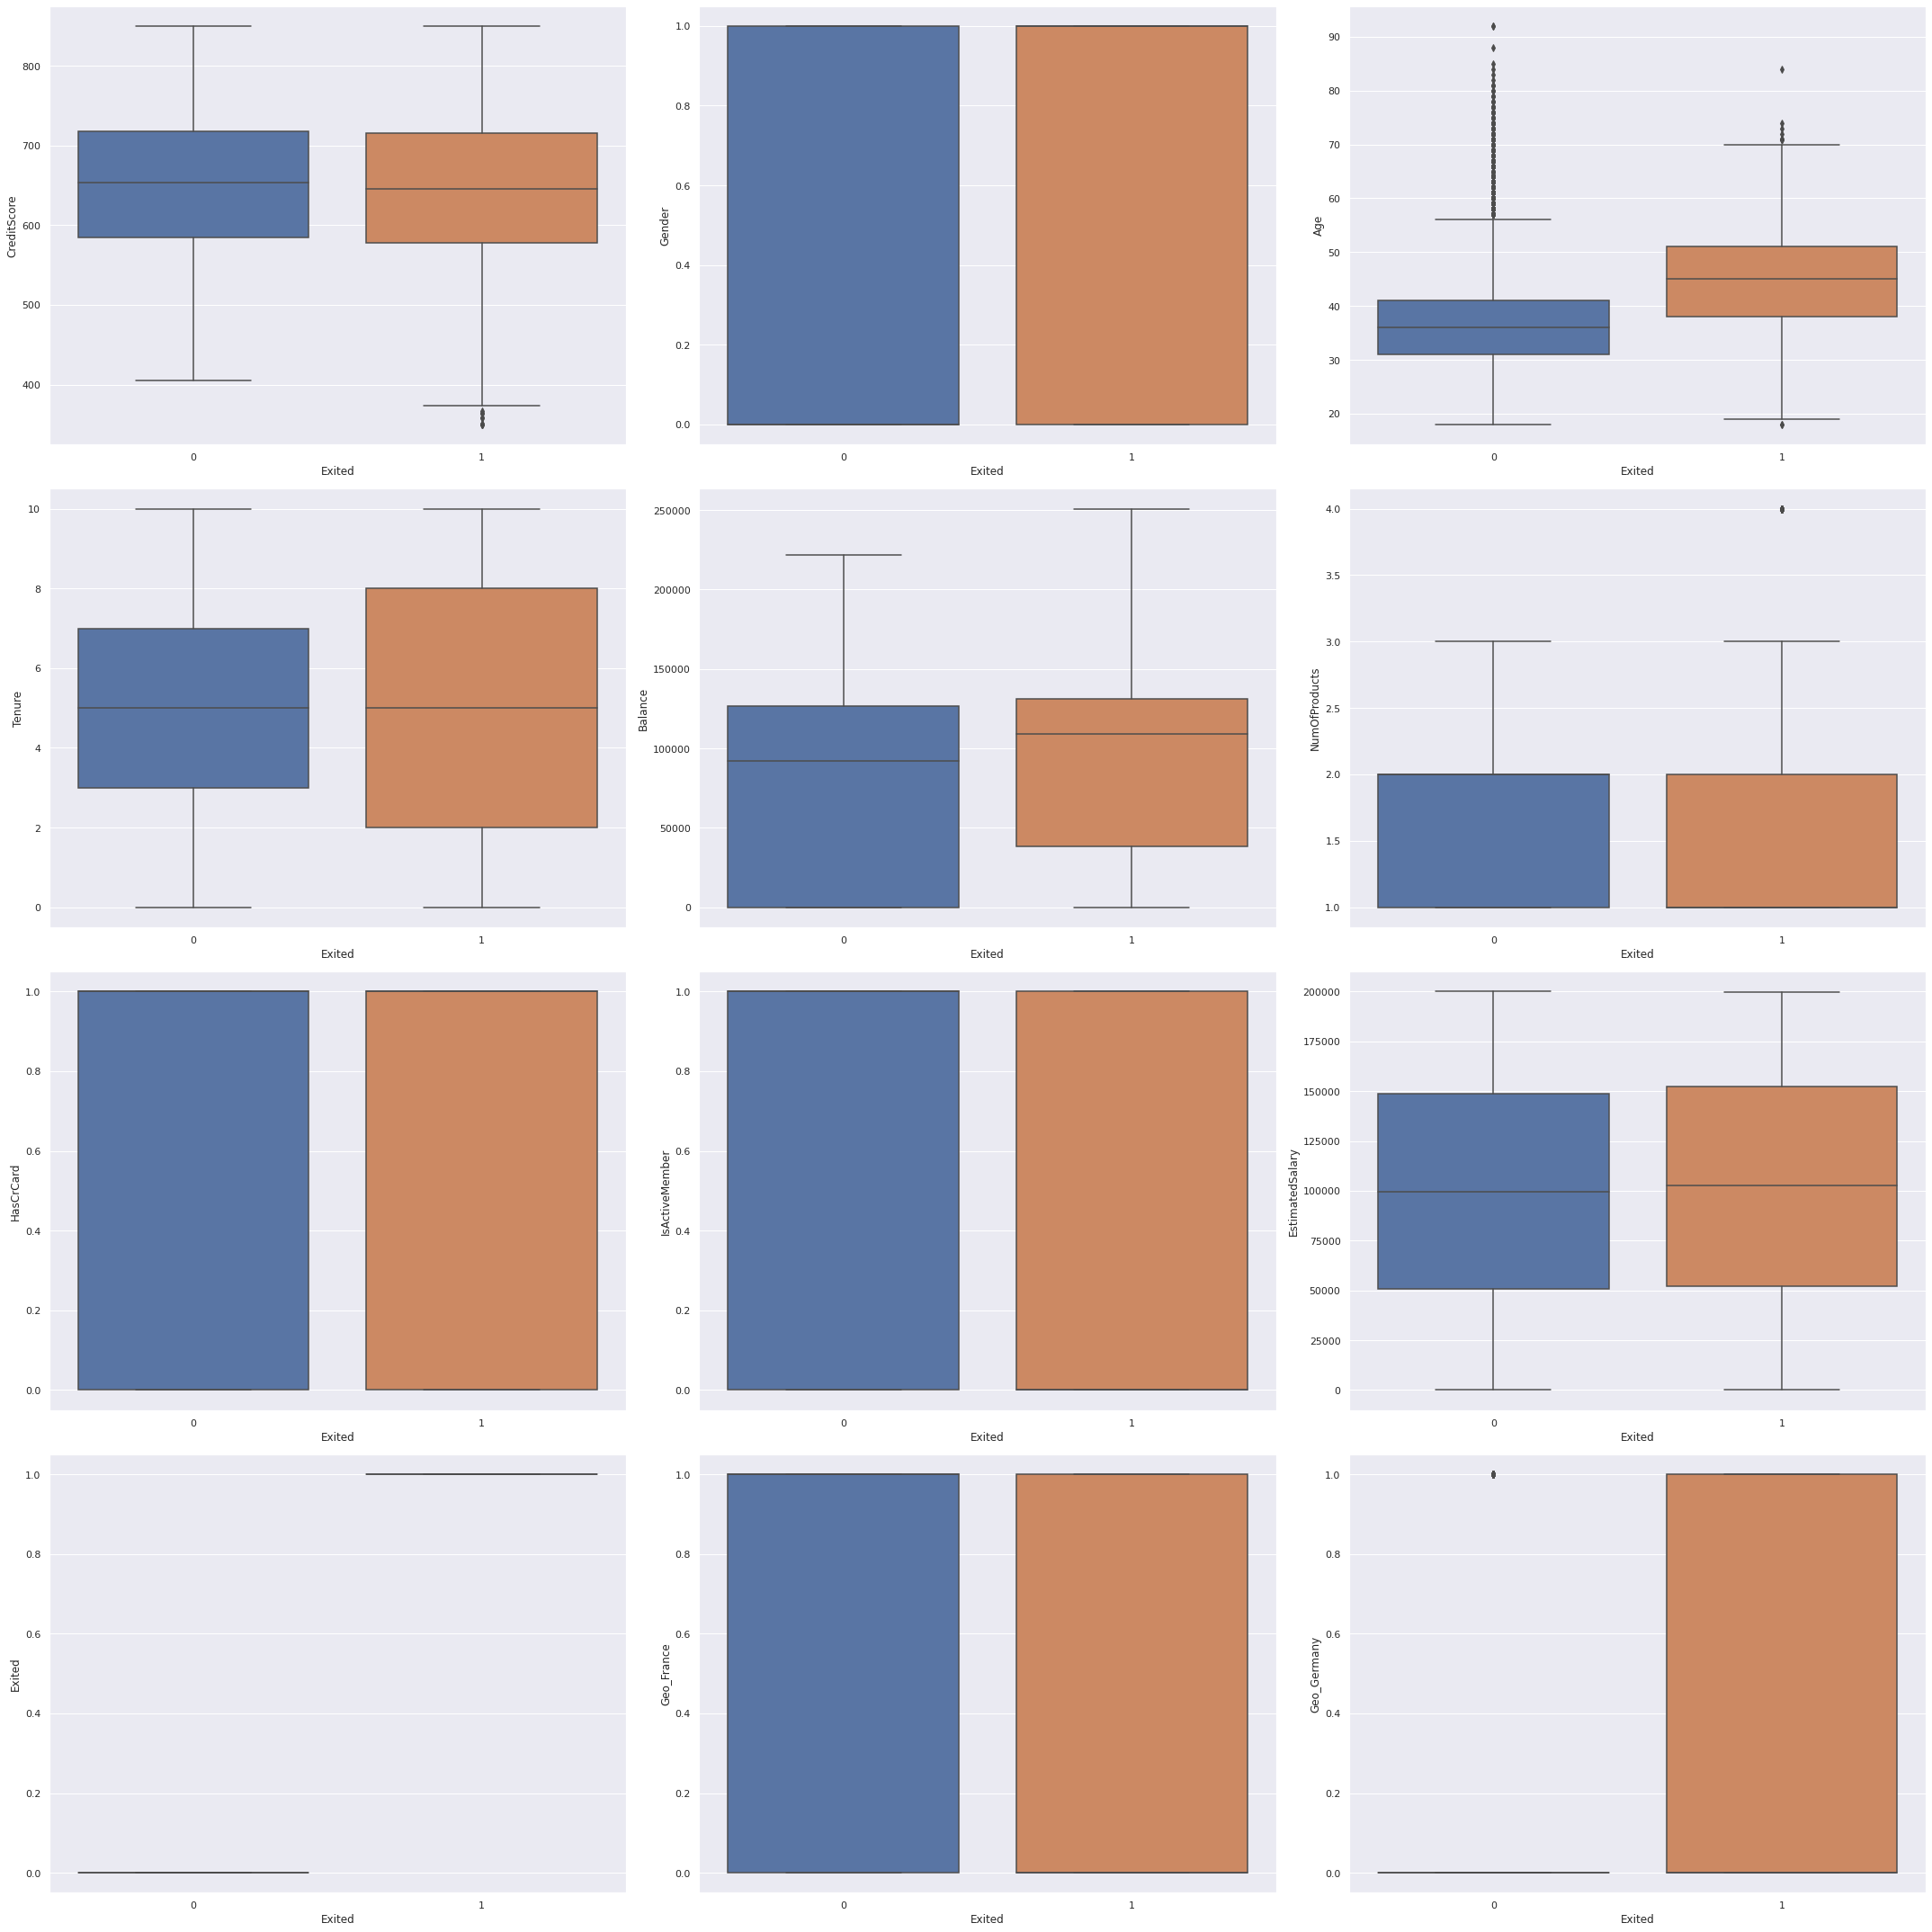

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(30, 30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
  if col > 2:
    row += 1
    col = 0
  axes = ax[row, col]
  sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]], ax = axes)
  col += 1
plt.tight_layout()
plt.show()

In [ ]:
x = churn_data_encoded.drop(['Exited'], axis = 1)
y = churn_data_encoded.Exited


In [ ]:
x.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
6,645,0,44,8,113755.78,2,1,0,149756.71,0,0,1
7,822,0,50,7,0.00,2,1,1,10062.80,1,0,0
8,376,1,29,4,115046.74,4,1,0,119346.88,0,1,0
9,501,0,44,4,142051.07,2,0,1,74940.50,1,0,0


In [ ]:
# Spliting the dataset into Training set and Test Set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
# We are applying Feature Scaling Technique because we don't want one independent variable dominating the other and it makes computtaions easy.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Sequential Model to initiate the ANN and dense module to build the layers


In [ ]:
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
classifier = Sequential()

# Now we are adding the input layer and the hidden layer
classifier.add(Dense(units=6, kernel_initializer = "uniform", activation = 'relu', input_dim = 12))

# Adding the second layer

classifier.add(Dense(units = 1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN: It means applying the SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training Set
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100, verbose=0)

score, acc = classifier.evaluate(x_train, y_train, batch_size=10)
print('Train Score: ', score)
print('Train Accuracy: ', acc)

# Making Predictions and Evaluating the model

# Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred>0.5)

print('*' * 20)

score, acc = classifier.evaluate(x_test, y_test, batch_size=10)
print('Test Score: ', score)
print('Test Score: ', acc)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


800/800 [==============================] - 1s 1ms/step - loss: 0.3373 - accuracy: 0.8614
Train Score:  0.3372529149055481
Train Accuracy:  0.8613749742507935
63/63 [==============================] - 0s 1ms/step
********************
200/200 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8635
Test Score:  0.33398252725601196
Test Score:  0.8634999990463257


Text(0.5, 12.5, 'Predicted Label')

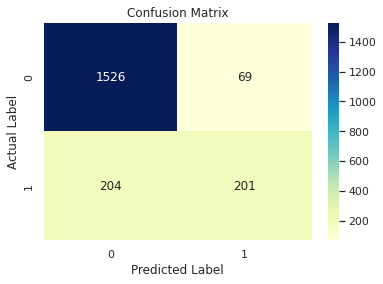

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


In [ ]:
# Import Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.74      0.50      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
# predict_prob=model.predict([testa,testb])

# predict_classes=np.argmax(predict_prob,axis=1)

In [ ]:
predict_prob = classifier.predict(x_test)
predict_classes = np.argmax(predict_prob, axis=1)


63/63 [==============================] - 0s 2ms/step


63/63 [==============================] - 0s 2ms/step


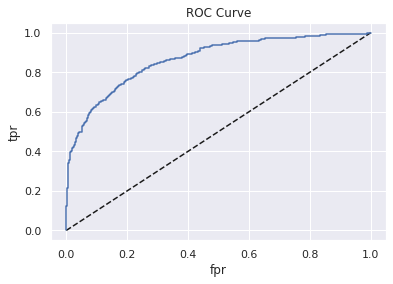

In [ ]:
from sklearn.metrics import roc_curve
# y_pred_proba = classifier.predict_prob(x_test)
predict_prob = classifier.predict(x_test)
predict_classes = np.argmax(predict_prob, axis=1)


fpr, tpr, thresholds = roc_curve(y_test, predict_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label = 'ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()

In [ ]:
# Area under ROC curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict_prob)


0.8660907929873448

### Evaluation for Multiple Training Instances

In [ ]:
# Evaluating the ANN

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def build_classifier():
  classifier = Sequential()
  classifier.add(Dense(units = 6, kernel_initializer='uniform', activation='relu', input_dim=12))
  classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
  classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
  classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = build_classifier, batch_size=10, epochs=100, verbose=0)
accuracies = cross_val_score(estimator=classifier, X = x_train, y = y_train, cv=10)
mean = accuracies.mean()
variance = accuracies.std()

<ipython-input-30-7c1eea6668fa>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, batch_size=10, epochs=100, verbose=0)


In [33]:
print('Mean accurcay score of 10 different models using Kfold cross validation: {}'.format(mean))

print('Standard Deviation of accuracy score of 10 different models using Kfold cross validation: {}'.format(variance))


Mean accurcay score of 10 different models using Kfold cross validation: 0.8433749914169312
Standard Deviation of accuracy score of 10 different models using Kfold cross validation: 0.021191468263885134


### Improving ANN with Dropout layer

In [36]:
from keras.layers import Dropout
classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer='uniform', activation='relu', input_dim=12))
classifier.add(Dropout(rate=0.1))

# Adding the second hidden layer

classifier.add(Dense(units = 6, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.1))

# Adding the output layer

classifier.add(Dense(units=1, kernel_initializer = 'uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set.
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100, verbose=0)

# Part 3: Making predictions and evaluating the model.

score, acc = classifier.evaluate(x_train, y_train, batch_size = 10)
print('Train score: ', score)
print('Train accuracy: ', acc)

# Predicting the test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

print('*' * 30)

score, acc = classifier.evaluate(x_test, y_test, batch_size = 10)
print('Test score: ', score)
print('Test accuracy: ', acc)

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


800/800 [==============================] - 1s 2ms/step - loss: 0.4056 - accuracy: 0.8364
Train score:  0.4055528938770294
Train accuracy:  0.8363749980926514
63/63 [==============================] - 0s 1ms/step
******************************
200/200 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8400
Test score:  0.403924822807312
Test accuracy:  0.8399999737739563


Text(0.5, 12.5, 'Predicted Label')

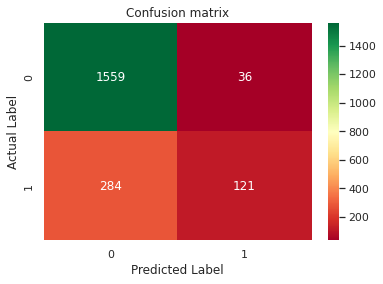

In [37]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdYlGn", fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [38]:
# Import classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1595
           1       0.77      0.30      0.43       405

    accuracy                           0.84      2000
   macro avg       0.81      0.64      0.67      2000
weighted avg       0.83      0.84      0.81      2000



63/63 [==============================] - 0s 1ms/step


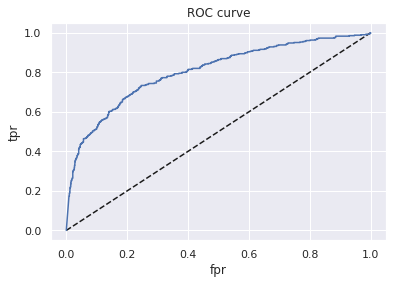

In [40]:
from sklearn.metrics import roc_curve
y_pred_prob = classifier.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [41]:
# Area under ROC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)



0.6380974495917024

### Tuning the ANN

In [44]:
from keras.metrics.metrics import accuracy
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

def build_classifier(optimizer):
  classifier = Sequential()

  classifier.add(Dense(units=6, kernel_initializer='uniform', activation = 'relu', input_dim=12))

  classifier.add(Dense(units=6, kernel_initializer='uniform', activation = 'relu'))

  classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics = [accuracy])

  return classifier

classifier = KerasClassifier(build_fn=build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs' :[100, 200],
              'optimizer':['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10)

grid_search = grid_search.fit(x_train, y_train, verbose=0)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_




<ipython-input-44-4d3d38c1bab4>:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn=build_classifier)


25/25 [==============================] - 0s 2ms/step


In [ ]:
print('Best Parameters after tuning: {}'.format(best_parameters))
print('Best Accuracy after tuning: {}'.format(best_accuracy))
